In [1]:

import pandas as pd
import numpy as np
import random
import pandas as pd

# Machine Learning Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt


C:\Users\casper\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
!pip install pandas 


In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('malicious.csv')
print(df.shape)
df.head()

(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [5]:
df.type.value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [6]:
from wordcloud import WordCloud

In [7]:
import matplotlib.pyplot as plt

Enter some text:br-icloud.com.br signin.eby.de.zukruygxctzmmqi.civpro.co.za http://www.marketingbyinternet.com/mo/e56508df639f6ce7d55c81ee3fcd5ba8/ https://docs.google.com/spreadsheet/viewform?formkey=dGg2Z1lCUHlSdjllTVNRUW50TFIzSkE6MQ retajconsultancy.com,


<function matplotlib.pyplot.show(close=None, block=None)>

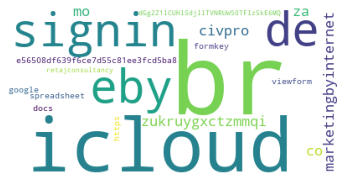

In [8]:
##phishing URLs: 
text=input("Enter some text:")
cloud=WordCloud(background_color="white").generate(text)
plt.imshow(cloud)
plt.axis('off')
plt.show

Enter some text:http://9779.info/%E6%A0%91%E5%8F%B6%E7%B2%98%E8%B4%B4%E7%94%BB/ http://www.824555.com/app/member/SportOption.php?uid=guest&langx=gb


<function matplotlib.pyplot.show(close=None, block=None)>

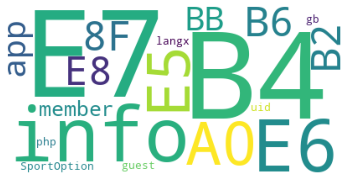

In [9]:
##Malware URLs: 
text=input("Enter some text:")
cloud=WordCloud(background_color="white").generate(text)
plt.imshow(cloud)
plt.axis('off')
plt.show

Enter some text://buzzfil.net/m/show-art/ils-etaient-loin-de-s-imaginer-que-le-hibou-allait-faire-ceci-quand-ils-filmaient-2.html, espn.go.com/nba/player/_/id/3457/brandon-rush, yourbittorrent.com/?q=anthony-hamilton-soulife,


<function matplotlib.pyplot.show(close=None, block=None)>

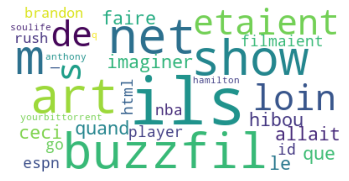

In [10]:
## benign URLs:
text=input("Enter some text:")
cloud=WordCloud(background_color="white").generate(text)
plt.imshow(cloud)
plt.axis('off')
plt.show

Enter some text:http://szgs.ru/information-for-you/interesting-articles/13-2008-08-04-06-37-10.html, http://www.sandroecicero.com.br/index.php?option=com_content&view=article&id=1&Itemid=3&vsig1_0=18, http://www.ekino-neureut.de/index.php?option=com_content&view=article&id=15&Itemid=15, http://www.rockabilly.it/gruppi/52-four-stars.html, http://www.rathgaelgym.org/squads/mag.1,


<function matplotlib.pyplot.show(close=None, block=None)>

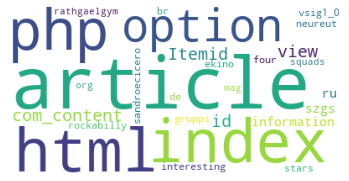

In [11]:
## defacement URLs:
text=input("Enter some text:")
cloud=WordCloud(background_color="white").generate(text)
plt.imshow(cloud)
plt.axis('off')
plt.show

In [25]:
# Load Url Data 
urls_data = pd.read_csv("urldata.csv")
 

In [26]:
type(urls_data)


pandas.core.frame.DataFrame

In [27]:
urls_data.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


In [28]:
#Data Vectorization Using TfidVectorizer
#Create A tokenizer

def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/')	# make tokens after splitting by slash
    total_Tokens = []
    for i in tkns_BySlash:
        tokens = str(i).split('-')	# make tokens after splitting by dash
        tkns_ByDot = []
        for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.')	# make tokens after splitting by dot
            tkns_ByDot = tkns_ByDot + temp_Tokens
        total_Tokens = total_Tokens + tokens + tkns_ByDot
    total_Tokens = list(set(total_Tokens))	#remove redundant tokens
    if 'com' in total_Tokens:
        total_Tokens.remove('com')	#removing .com since it occurs a lot of times and it should not be included in our features
    return total_Tokens


In [29]:
# Labels
y = urls_data["label"]

In [30]:
# Features
url_list = urls_data["url"]

In [31]:
 # Using Default Tokenizer
vectorizer = TfidfVectorizer()

In [32]:
# Store vectors into X variable as Our XFeatures
X = vectorizer.fit_transform(url_list)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Model Building

logit = LogisticRegression()	#using logistic regression
logit.fit(X_train, y_train)

C:\Users\casper\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
# Accuracy of Our Model
print("Accuracy ",logit.score(X_test, y_test))

Accuracy  0.9649316827797795


In [35]:
X_predict = ["https://www.youtube.com/watch?v=aa0nOFo74Qo&list=RDaa0nOFo74Qo&start_radio=1","https://db.aa419.org/fakebanksview.php?key=164641","http://szgs.ru/information-for-you/interesting-articles/13-2008-08-04-06-37-10.html","https://db.aa419.org/fakebanksview.php?key=164900"]

In [36]:
X_predict = vectorizer.transform(X_predict)
New_predict = logit.predict(X_predict)

In [37]:
print(New_predict)

['good' 'bad' 'good' 'bad']
